In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_6592\386196737.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
filename = 'data/tr_eikon_eod_data.csv'
f = open(filename, 'r')

In [7]:
raw = pd.read_csv(filename,index_col=0, parse_dates=True)

In [10]:
raw.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


In [11]:
data = raw[['.SPX', '.VIX']].dropna()

In [12]:
data.head()

,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


We are going to use these 2 stocks to pit against each other

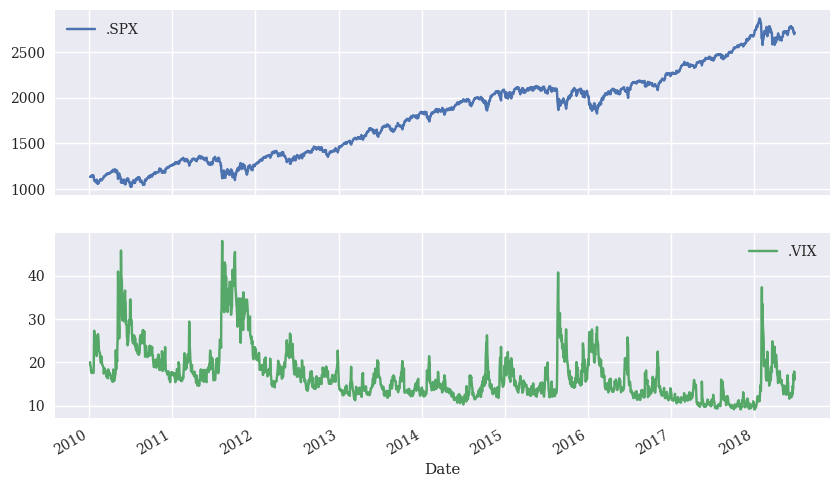

In [13]:
data.plot(subplots=True, figsize=(10, 6));

When plotting (parts of) the two time series in a single plot and with adjusted scalings, the stylized fact of negative correlation between the two indices becomes evident through simple visual inspection

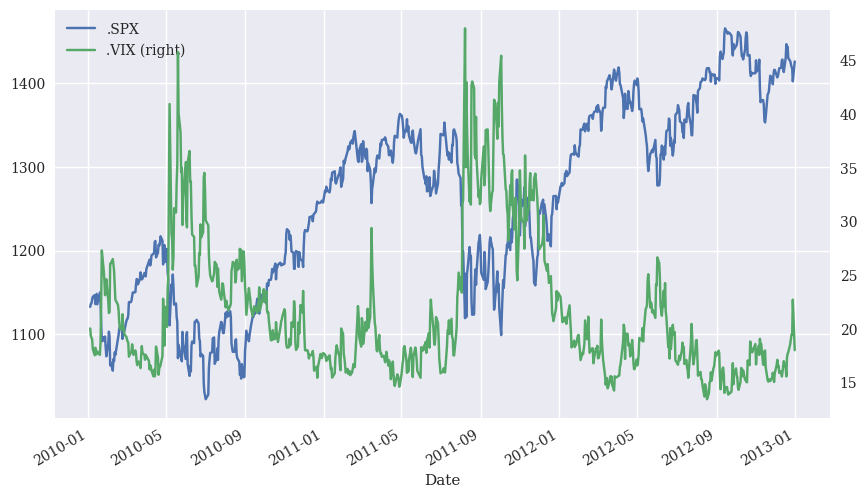

In [14]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));

In [15]:
#convert to log returns instead of absolutes
rets = np.log(data / data.shift(1))

In [16]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [17]:
 rets.dropna(inplace=True)

In [18]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024
2010-01-11,0.001745,-0.032514


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

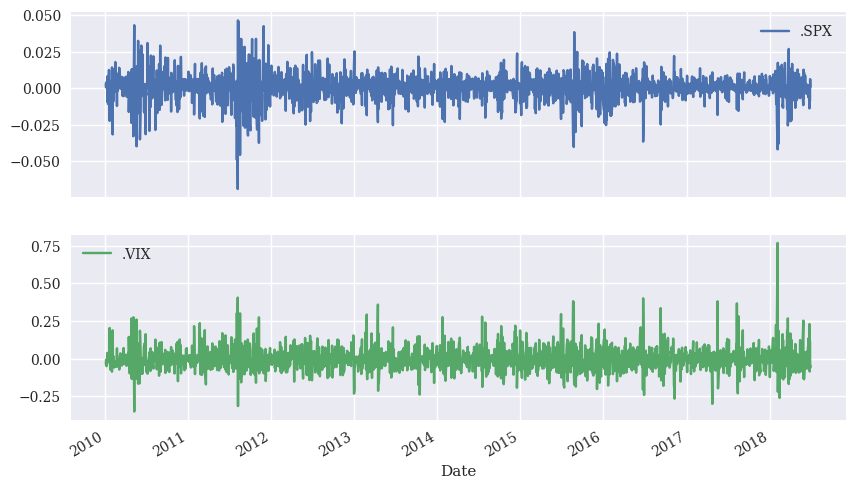

In [19]:
rets.plot(subplots=True, figsize=(10, 6))

In [20]:
#check the volitality index

The pnadas scatter matrix comes in handy here for visulisations. plot the log retusn of the 2 series against ea other. add to histogram opr kernel density estimator on diagonal

#### Scatter Matrix

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

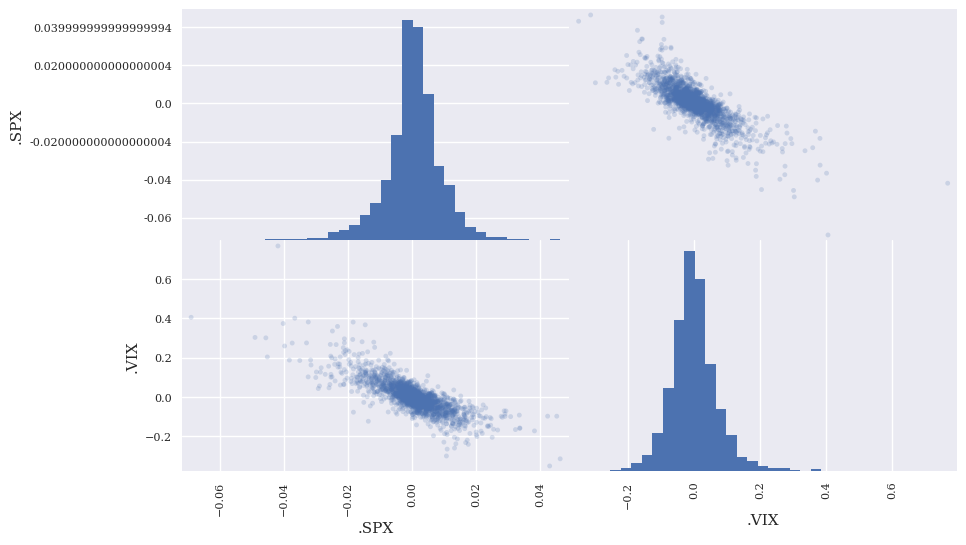

In [22]:
pd.plotting.scatter_matrix(rets,  alpha=0.2, diagonal='hist', hist_kwds={'bins': 35},figsize=(10, 6))

# OLS Regression

an ordinary leasyt squares regression analysis is convenient to impliment

In [24]:
#Impliment the OLS Regression
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)

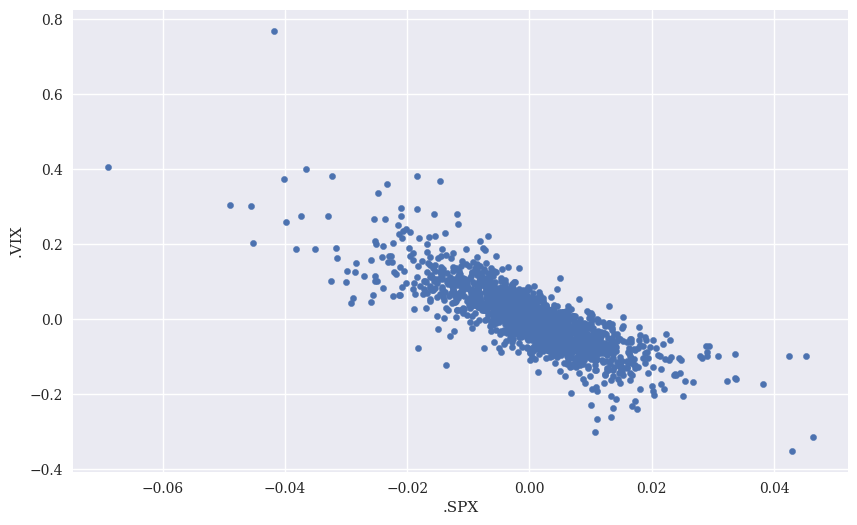

In [28]:
#Plot the regression as a scatter plot
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))

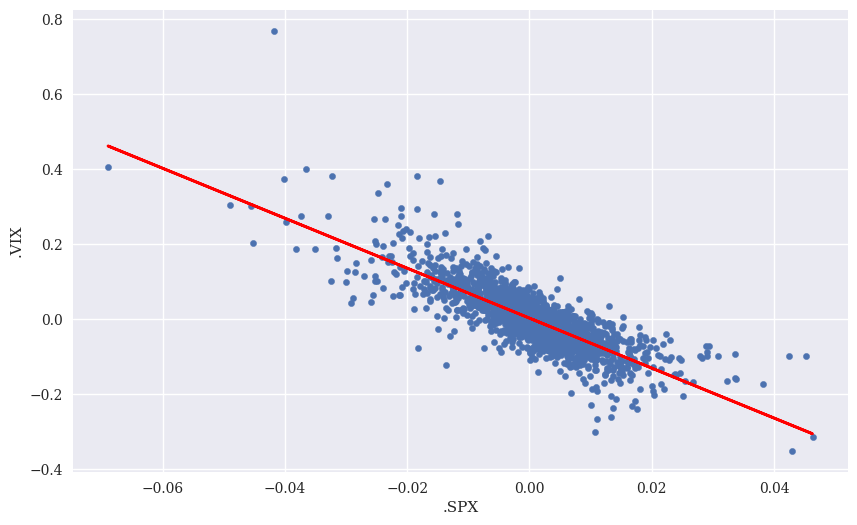

In [29]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

## Correlation

In [30]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


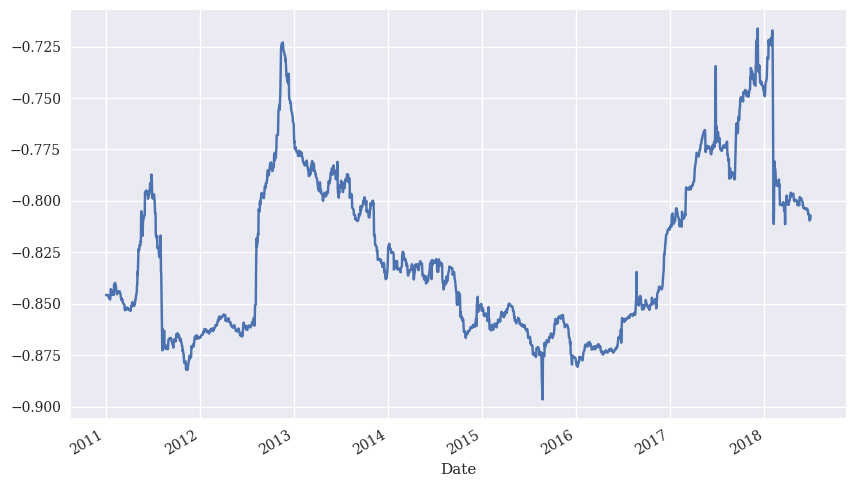

In [32]:
#plotting the rolling correlation over time
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6))

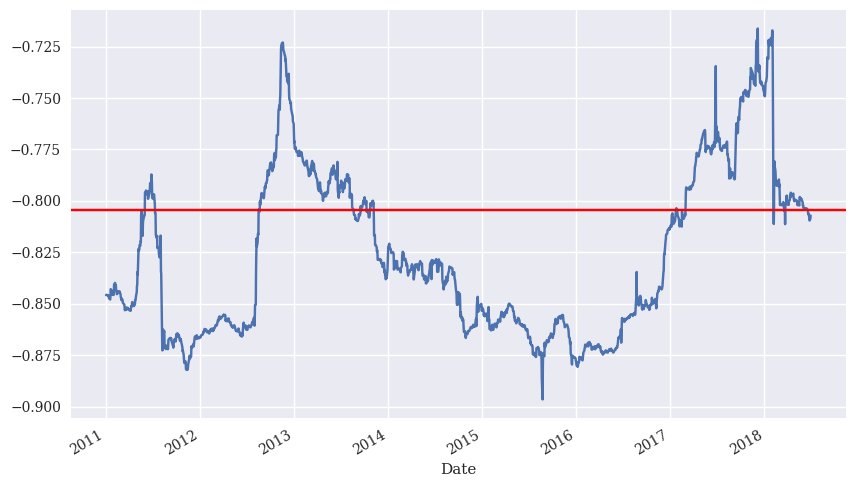

In [33]:
# add sytatic value tot he plot as horizontal line
ax = rets['.SPX'].rolling(window=252).corr(
    rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r')

this is the correlation between sP and VIX over time

# High Frequency Data

tick data sets are special case... roiughly the same as API data as in above (Daily at close) Here is a sample of highintensity ticker data

https://github.com/yhilpisch/py4fi2nd

In [34]:
ticker_filename = 'data/fxcm_eur_usd_tick_data.csv'
f = open(ticker_filename, 'r')

In [35]:
tick = pd.read_csv(ticker_filename, index_col=0, parse_dates=True)

In [37]:
tick.sample(100)

,Bid,Ask
2018-06-29 09:24:07.413,1.16471,1.16471
2018-06-29 10:33:49.256,1.16450,1.16452
2018-06-29 16:38:26.235,1.16758,1.16760
2018-06-29 18:02:39.694,1.16795,1.16795
2018-06-29 03:07:17.413,1.16359,1.16363
...,...,...
2018-06-29 18:00:06.761,1.16787,1.16788
2018-06-29 13:38:00.979,1.16329,1.16331
2018-06-29 07:27:20.089,1.16338,1.16340
2018-06-29 08:36:16.154,1.16453,1.16452


In [38]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


In [42]:
# calculate the mid price for every data row
tick['Mid'] = tick.mean(axis=1)

<Axes: >

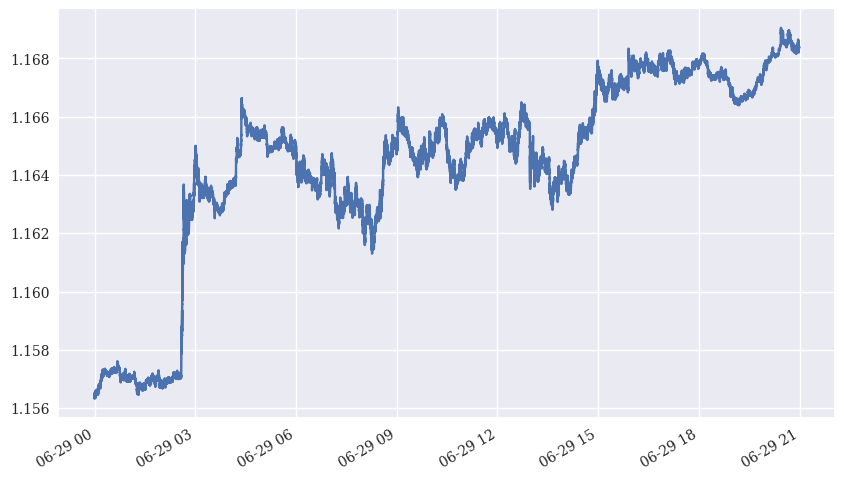

In [43]:
tick['Mid'].plot(figsize=(10, 6))

In [44]:
# resample to a 5minute bar of data - this can be used to beacktest algo trades or impliment a technical analysis

In [45]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [46]:
tick_resam.head()

,Bid,Ask,Mid
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


<Axes: >

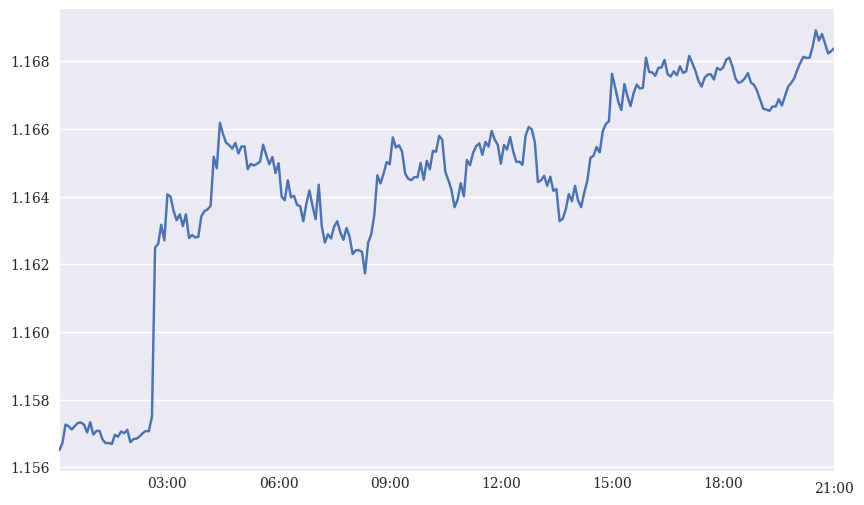

In [47]:
tick_resam['Mid'].plot(figsize=(10, 6))

In [48]:
# it s a bit smoother as it\'s now in 5 minute increments instead of evey bloody second
